<a href="https://colab.research.google.com/github/Bhojraj-Jadhav/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bank Marketing Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**Abhishek Nagpure 
##### **Team Member 2 -**Priyanka Bajaj 
##### **Team Member 3 -**Bhojraj Jadhav
##### **Team Member 4 -**Shabana Ali 

# **Project Summary -**

All bank marketing campaigns are dependent on customer’s huge electronic data. The size of these data sources is impossible for a human analyst to come up with interesting information that will help in the decision-making process. Data mining models are completely helping in the performance of these campaigns. The purpose is increasing the campaign effectiveness by identifying the main characteristics that affect the success based on a handful of algorithms that we will test (e.g. Logistic Regression, Random Forests, Decision Trees and others). With the experimental results we will demonstrate the performance of the models by statistical metrics like accuracy, sensitivity, precision, recall, etc. With the higher scoring of these metrics, we will be able to judge the success of these models in predicting the best campaign contact with the clients for subscribing deposit. The aim of the marketing campaign was to get customers to subscribe to a bank term deposit product. Whether they did this or not is variable ‘y’ in the data set. The bank in question is considering how to optimize this campaign in future.

The objective is to know the fundamentals of the data like : 
* Shape of Data
* Duplicate value
* Missing value
* Understanding the variable(statistics value and columns 
* Checking the categorical and Numerical feature
* Take a first look of outliers
* EDA
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis 
* We will be creating a classification algorithm and the insights we derive from this dataset with the help of 
* Feature engineering and data pre-processing
* Handling with outliers
* categorical encoding
* feature manipulation and selection
* Handling imbalanced dataset
* Data Splitting(Train-test split) 
* Data scaling
* Created some functions for evalution and visualizing of model. 
ML model implementation: (Logistics Regression, Decision tree, Random forest, Xg boost Classifer,KNN and SVM)



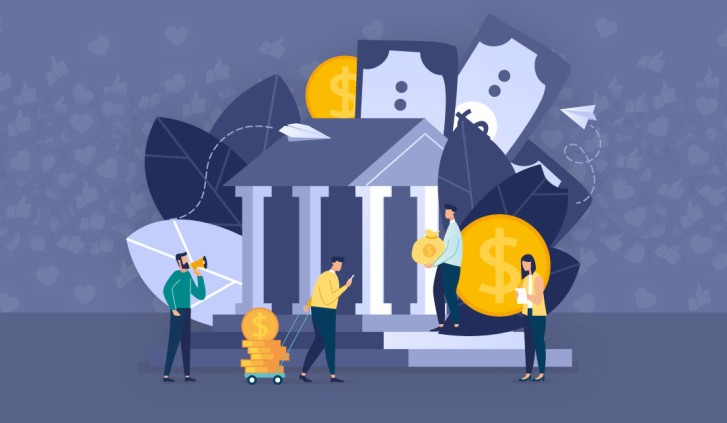

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe to a term deposit (variable y).**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import plotly.express as px
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.feature_selection import SelectKBest,chi2
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting the Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/bank-full.csv', sep = ";")

### Dataset First View

In [4]:
# Dataset First Look

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 45211 rows and 17 columns.


### Dataset Information

In [6]:
# Dataset Info i.e checking null counts in columns and data type of each.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count.

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

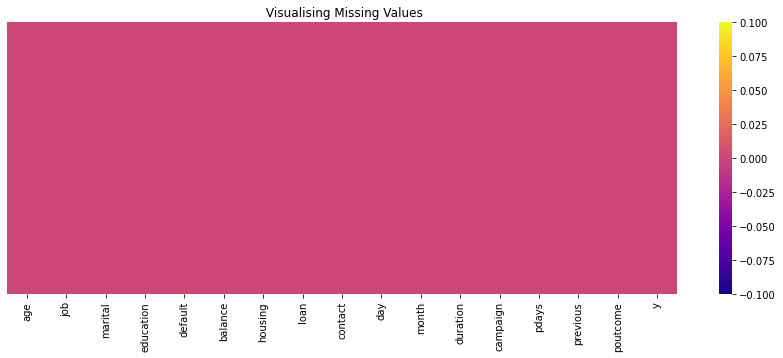

In [9]:
# Visualizing the missing values.

plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

Aa per the visualisation Data set does not cointain any missing value.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns.

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
# Dataset Describe.

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Variables Description 

*  age (numeric)
*  job : type of job (categorical: admin, blue-collar, entrepreneur, housemaid,management, retired, self-employed, services, student, technician, unemployed, unknown)
*  marital : marital status (categorical: divorced, married, single, unknown; note: 'divorced' means divorced or widowed)
*  education (categorical:high.school, illiterate, professional.course, university.degree, unknown)
*  default: has credit in default? (categorical: no, yes, unknown)
*  housing: has housing loan? (categorical: no, yes, unknown)
*  loan: has personal loan? (categorical: no, yes, unknown)

### <b> Related with the last contact of the current campaign:</b>
*  contact: contact communication type (categorical: cellular,telephone)
*  month: last contact month of year (categorical: jan, feb, mar, april, may,june, july, aug, sep, oct, nov, dec)
*  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration = 0 then y ='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
*  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*  previous: number of contacts performed before this campaign and for this client (numeric)
*  poutcome: outcome of the previous marketing campaign (categorical: failure, nonexistent, success)


### <b>Output variable (desired target):</b>
*  y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Check Unique Values for each variable.

In [12]:
# Extracting categorical features.

categorical_features= df.select_dtypes(include='object')
categorical_features

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [13]:
# Check Unique Values for each variable.

for i in categorical_features:
   print(" %s" % i,sep = '\n')
   print(df[i].value_counts())
   print("-"*40)

 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------
 marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------------------------------------
 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
----------------------------------------
 default
no     44396
yes      815
Name: default, dtype: int64
----------------------------------------
 housing
yes    25130
no     20081
Name: housing, dtype: int64
----------------------------------------
 loan
no     37967
yes     7244
Name: loan, dtype: int64
----------------------------------------
 contact
cellular     29285
unknown      13020
telephone     2906
Name

## 3. ***Data Wrangling***

### Data Wrangling Code

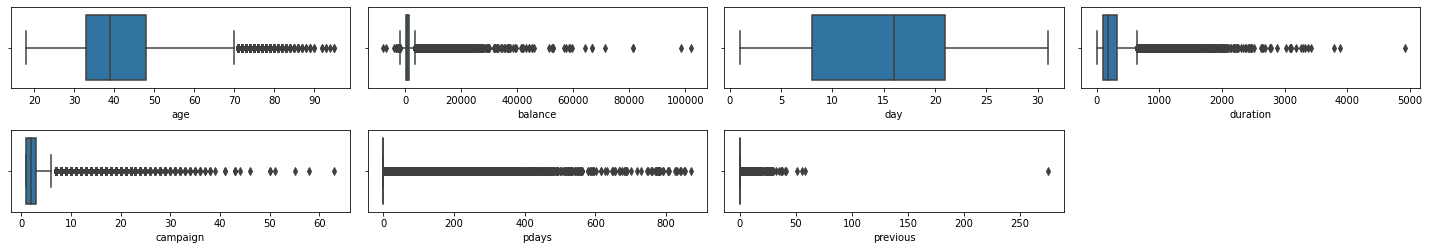

In [14]:
# Let's take a look at out lier.

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

### What all manipulations have been done and insights are found?

1) In the data set there are 45211 rows and 17 columns.

2) Data does not contain any missing values.

3) Data does not cointain any duplicate value as well.

4) Data conitains 10 categorical columns.
  
5) And remainings are numerical i.e 7.

6) Some of the numerical features contains outlirs namely age,balance,duration,campaign, pdays and previous. Since, EDA has to perform on the unprocessed data here we are not performing any opration on column cointains outliers.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Univeriate Analysis

#### Chart - 1

In [15]:
# Getting the couts of each of the category present in the column.

df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

[Text(0.5, 1.0, 'Count of job categories')]

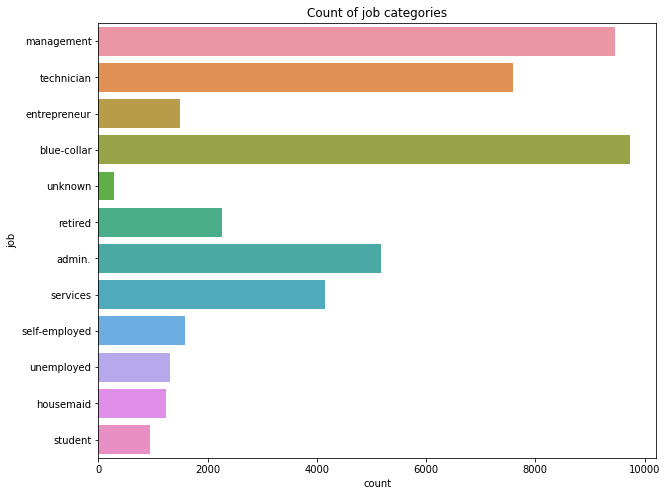

In [16]:
#  visualization count plot for job category.

fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,y='job',)
ax.set(title='Count of job categories')

##### 1. Why did you pick the specific chart?


To counts the number of observations per category for a categorical variable,
counts the number of observations per category for a categorical variable,

##### 2. What is/are the insight(s) found from the chart?

Client with job type as blue-collar records are high in given dataset and unknown are very less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As per above findings at this point we are unable to decide job type with unkown subcategory is very less and blue caller subcategory people would might have less response to the phone calls.

#### Chart - 2

In [17]:
# Getting the couts of each of the category present in the column.

df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

[Text(0.5, 1.0, 'Count of Marital categories')]

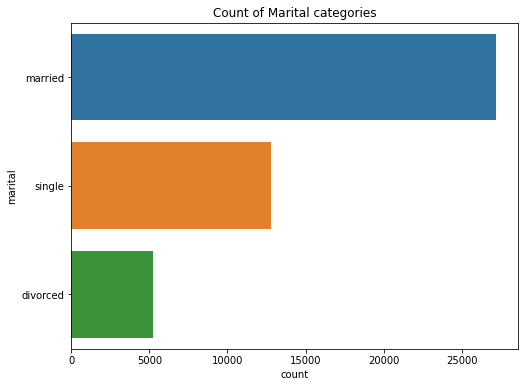

In [18]:
# visualising the cout of each of the category of maretial stetus.

fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='marital',)
ax.set(title='Count of Marital categories')

##### 1. Why did you pick the specific chart?

To visualize the univeiate counts for the maretial column with its subcategory counts.

##### 2. What is/are the insight(s) found from the chart?

Majority of the customers are married. Followed by Single, divorced.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This simply denotes the customer’s marital status.

#### Chart - 3

In [19]:
# Getting the couts of each of the category present in the column.

df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

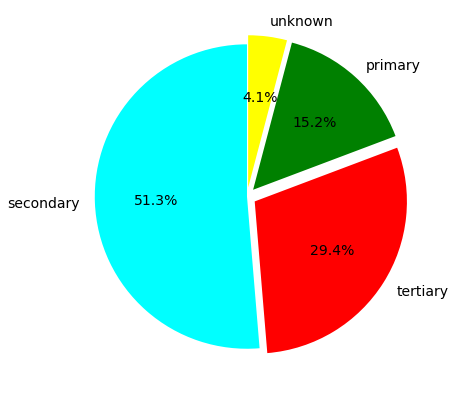

In [20]:
# Chart - 4 visualization code.

plt.rcParams['figure.figsize'] = 7,7
labels = df['education'].value_counts().index.tolist()
sizes = df['education'].value_counts().tolist()
explode = (0, 0.06,0.06,0.06)
colors = ['cyan', 'red', 'green','yellow']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

##### 1. Why did you pick the specific chart?

To Visualize the subcategories of education. 

##### 2. What is/are the insight(s) found from the chart?

Most of the data tence to secondary and tertiary category hence we can say that Higher the education higher the chances of Subscibing the term plan.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on education we can target the coustomer It increases the chances of subcribing term plan.

#### Chart - 4

In [21]:
# Numeric Features.
numeric_features= df.select_dtypes(exclude='object')

# Numeric Features info.
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


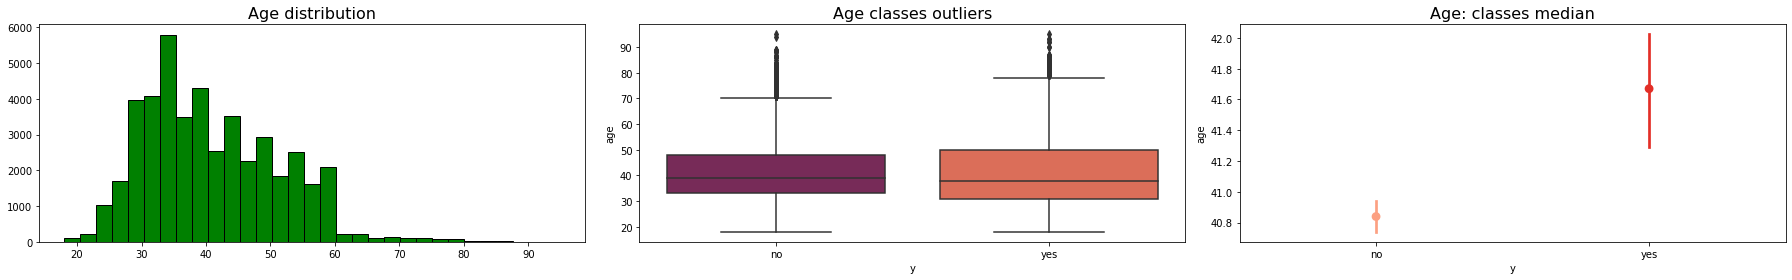

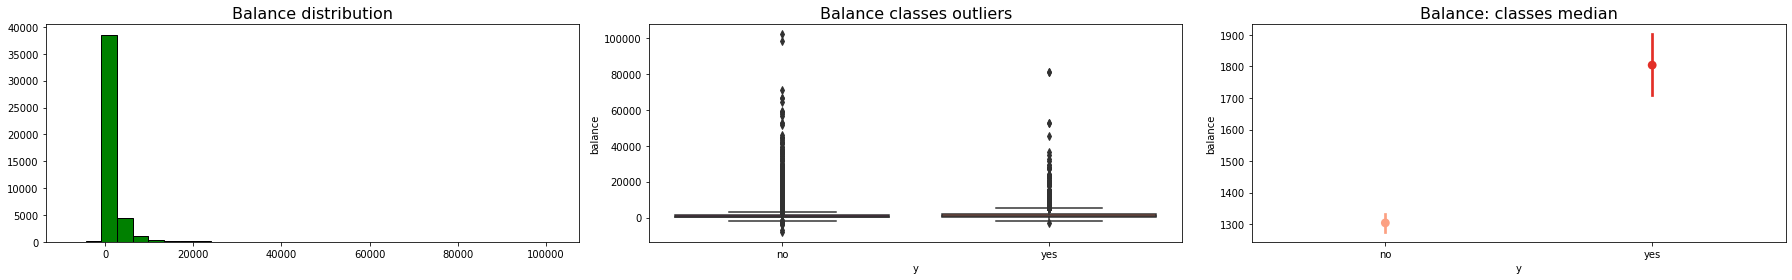

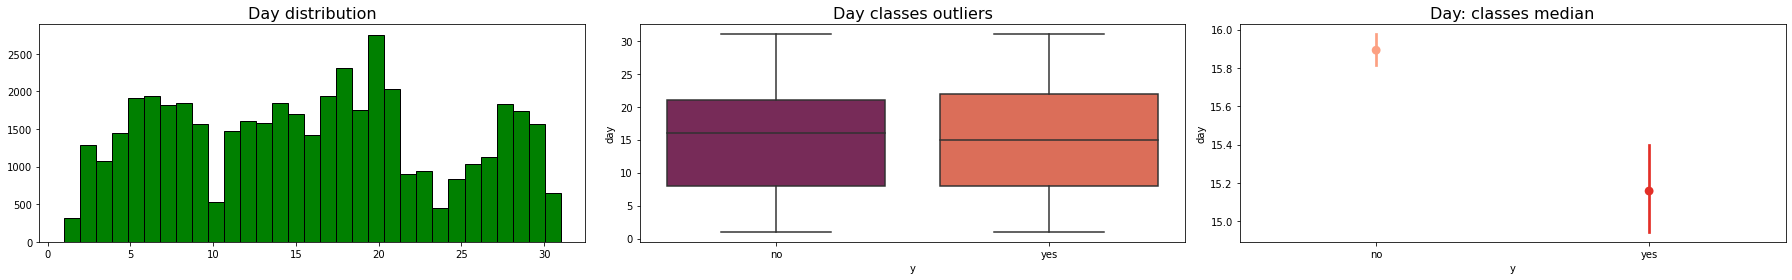

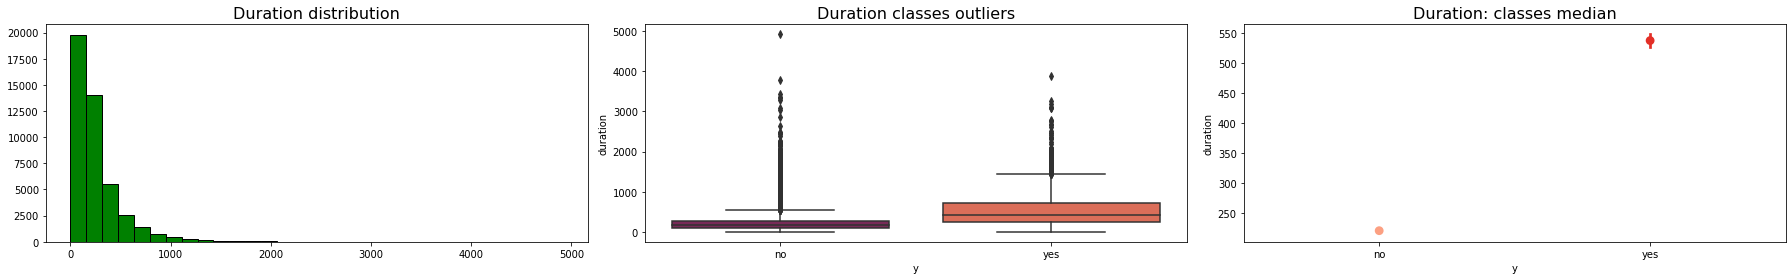

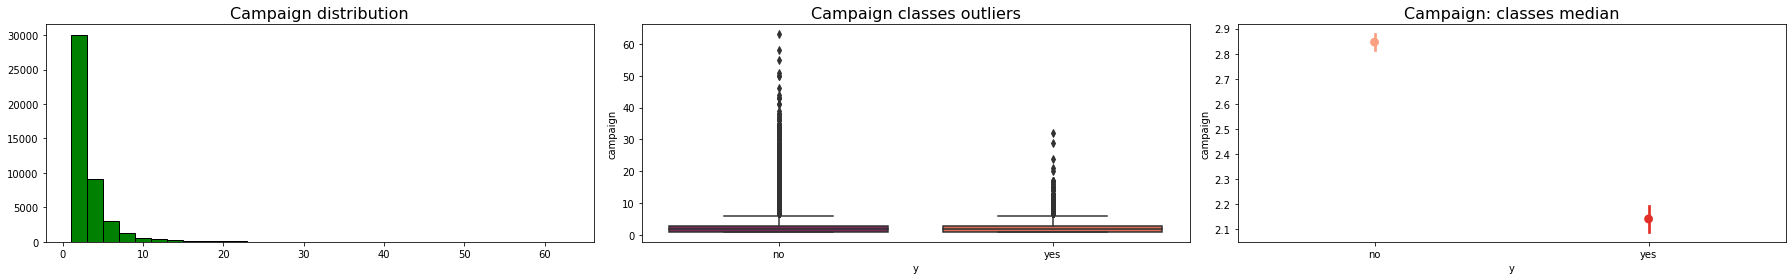

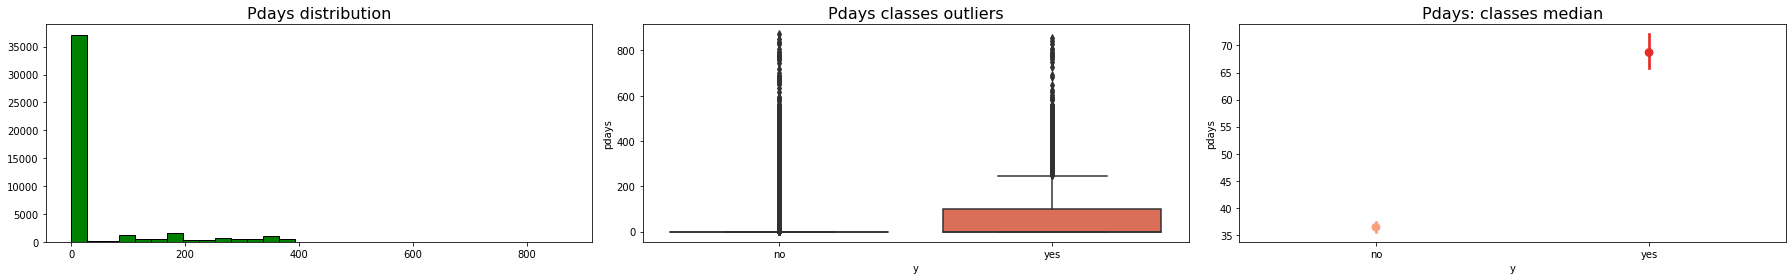

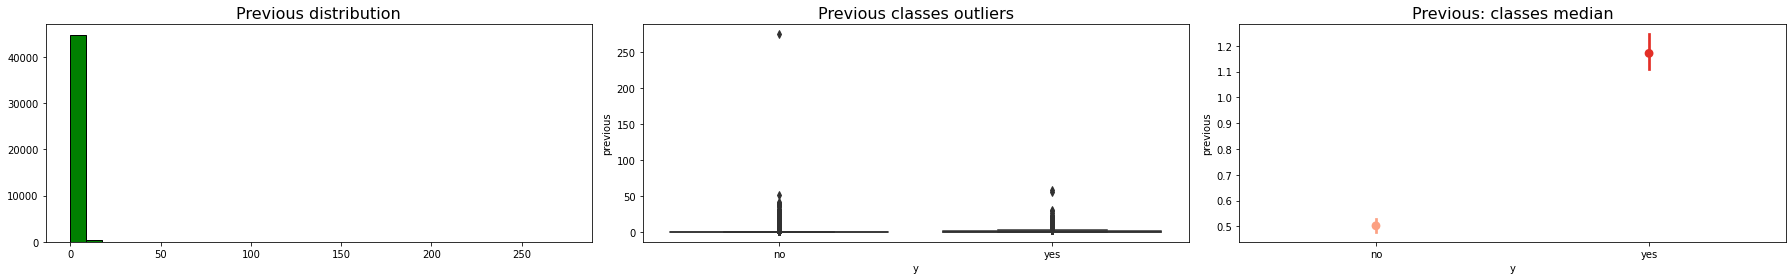

In [22]:
# outlier code 2
for col in numeric_features:
    # setting for multiple graphs
    fig, axs =  plt.subplots(nrows=1, ncols=3, figsize = (25,4))
    axs = axs.reshape(-1)
    
    # plotting the gerneral histogram
    axs[0].hist(df[col], bins=31, edgecolor = 'black', color = 'green')#color = '#292929')
    axs[0].set_title(col.title() + ' distribution', fontsize=16)
    
    # plotting boxcox
    sns.boxplot(data= df, y=col, x='y', ax=axs[1], palette = 'rocket')
    axs[1].set_title(col.title() + ' classes outliers', fontsize=16)
    
    # plotting meadian of the subscrition (no/yes) classes
    sns.pointplot(data=df,y= col, x='y', ax=axs[2], palette = 'Reds')
    axs[2].set_title(col.title() + ': classes median', fontsize=16)
    
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

To know the skewness and outliers in the data for each variable.
to see the  pointplot for median in numerical categories of subscription.

##### 2. What is/are the insight(s) found from the chart?

1) The clients that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40.  The client response for both yes and no case overlap quite a lot, which means that age isn’t necessarily a good indicator for which customer will subscribe and which clients will not.

2) The attribute highly affects the output target. The duration is not known before a call is performed. Also, after the end of the call, the target variable y is obviously known.
 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Got More focused on the type of the customers like  increased the chances for success 
of campiagn.

#### Chart - 5

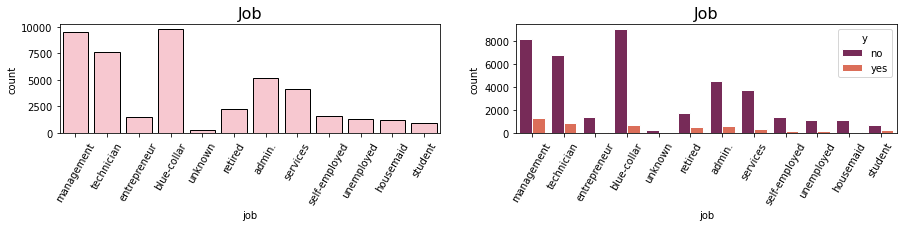

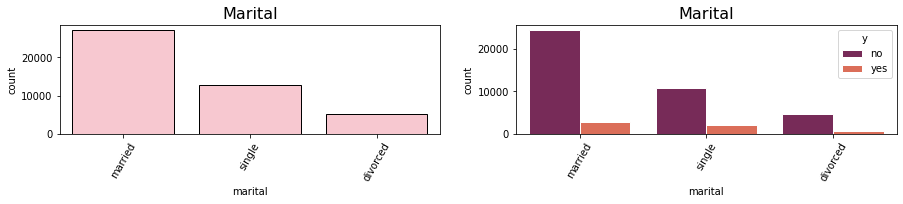

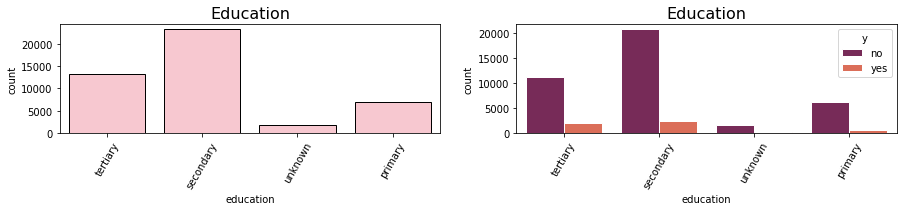

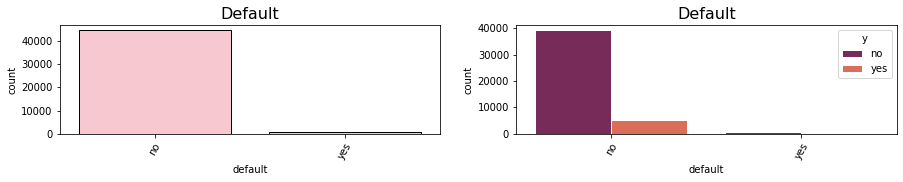

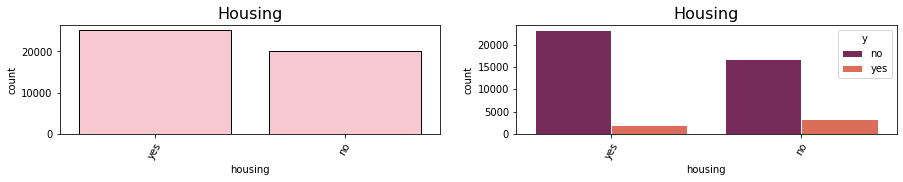

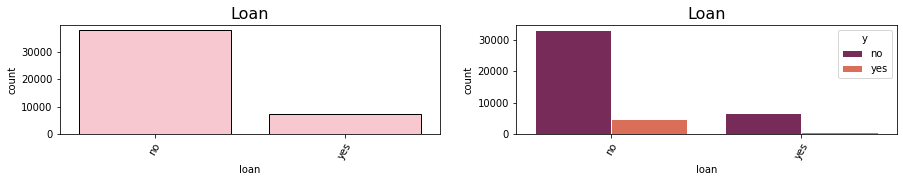

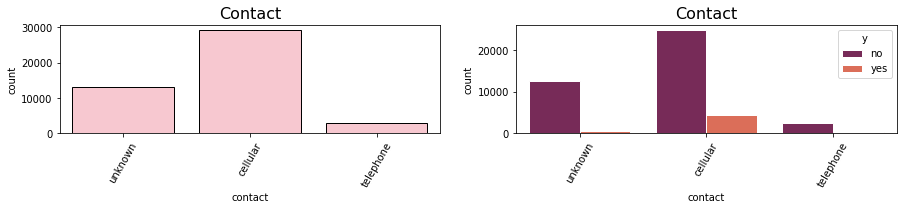

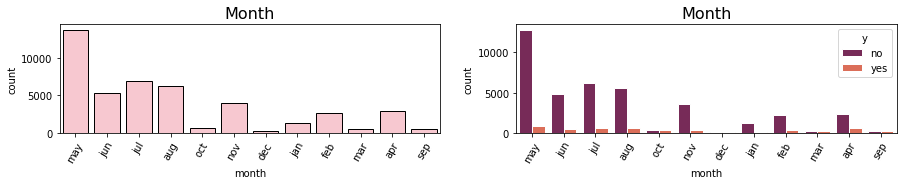

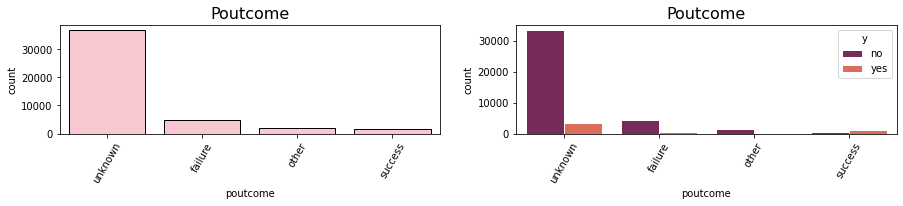

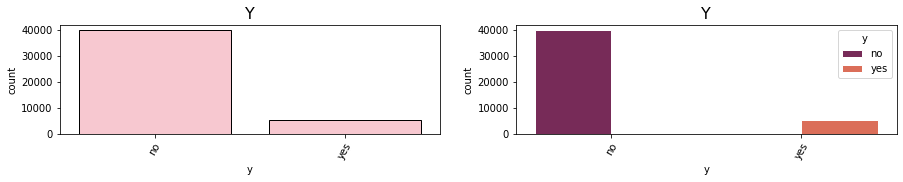

In [23]:
# Checking the count of clients who were intrested in the subcribtion of term deposite.

import plotly.express as px

for col in categorical_features:
    
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (15,2))
    axs = axs.reshape(-1)
    
    sns.countplot(data=df, x=col, ax=axs[0], edgecolor = 'black', color = 'pink')
    axs[0].set_title(col.title(), fontsize=16)
    axs[0].set_xticklabels(labels = df[col].unique(), rotation=60)
    
    sns.countplot(data=df, x= col, hue='y', ax=axs[1], palette = 'rocket', edgecolor = 'w')
    axs[1].set_title(col.title(), fontsize=16)
    axs[1].set_xticklabels(labels = df[col].unique(), rotation=60)
  

##### 1. Why did you pick the specific chart?

To check the count of clients who were intrested in the subcribtion of term deposite.

##### 2. What is/are the insight(s) found from the chart?

This analysis is of numeric features and categorical features. In analysis of numeric variables, it checks for the general distribution; countplot for clients that subscribed (‘yes’) versus those whose not subscribe(‘no’).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will create possitive impact 

#### Chart - 6

In [24]:
# Checking the distribution of Age with respect to balance column.

import plotly.express as px

fig = px.scatter(df, x="age", y="balance", color="y")
#fig.update_traces(quartilemethod="exclusive")
fig.show()


##### 1. Why did you pick the specific chart?

The scatter plot is selected because they show the extent of correlation between age and balance.

##### 2. What is/are the insight(s) found from the chart?

Across majority of the people have savings of less than 20k 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This analysis gives the insights majority of the clients between 18 to 35 have low balance and on the otherhand clients of age 60 have good balance and can be potential clients. 

#### Chart - 7

In [25]:
# Checking the distribution of campign with respect to duration column.

fig = px.scatter(df, x="campaign", y="duration", color="y")
fig.show()

##### 1. Why did you pick the specific chart?

The scatter plot is selected because they show the extent of correlation between campaign and duration

##### 2. What is/are the insight(s) found from the chart?

The more the duration the calls were, they had higher probability in making a deposit
Duration of calls faded as the time period of campaign extended further
There were many positive leads in the initial days of campaign.

##### 3. Will the gained insights help creating a positive business impact? 

Initialy in the campign poples were intrested but delay in the telecom service lost the intrest of the clients

#### Chart - 8

<BarContainer object of 45211 artists>

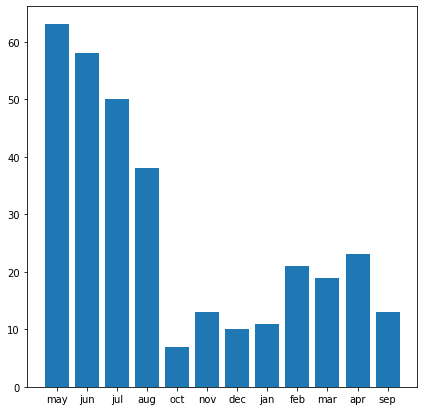

In [26]:
# Chart - 9 visualization code

plt.bar(df['month'], df['campaign'])

##### 1. Why did you pick the specific chart?



To visualize the distribution of moth column on the basis of campign column.

##### 2. What is/are the insight(s) found from the chart?

We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July)
Usually education period starts during that time so there is a possibility that parents make deposits in the name of their children.
They also have made their campaign in the end of the bank period.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As it is starting of academic year parents will think for about financial planning via deposits in bank. 

#### Chart - 9 - Correlation Heatmap

<AxesSubplot:>

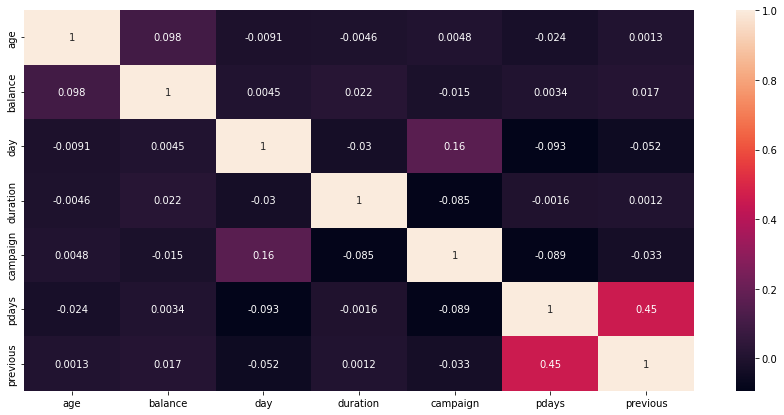

In [27]:
# Correlation Heatmap visualization code.

## Checking for correlation.
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

##### 1. Why did you pick the specific chart?

To visualise the multicollinearity of the numeric veriables. 

##### 2. What is/are the insight(s) found from the chart?

From the correlation matrix, there is almost none correlation among numeric variables present. Only exception goes to correlation between ‘duration’ and ‘subscription’ as expected.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


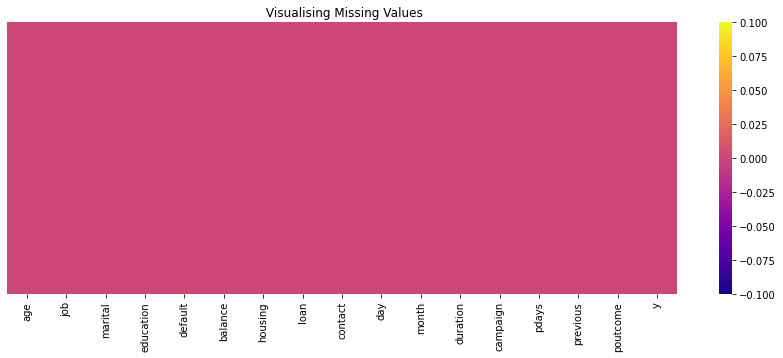

In [28]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values");

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no any missing values present in the data set. Hence no need to worry about that.

### 2. Handling Outliers

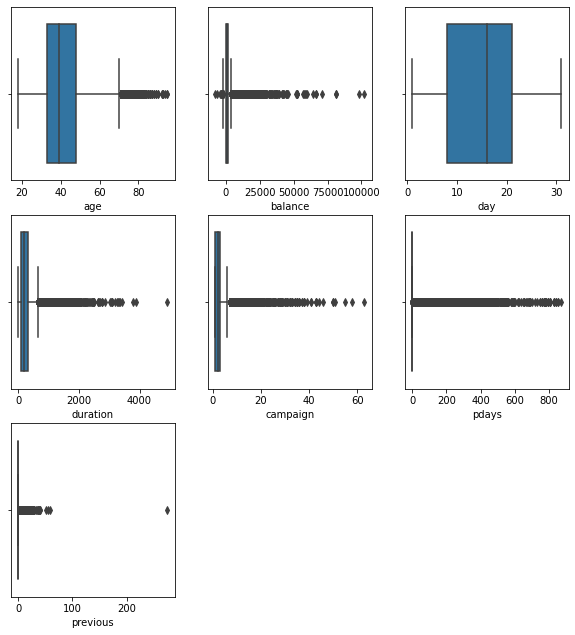

In [29]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(10,30), facecolor='white')
plotnumber =1
for numeric_features in numeric_features:
    ax = plt.subplot(8,3,plotnumber)
    sns.boxplot(df[numeric_features])
    plt.xlabel(numeric_features)
    plotnumber+=1
plt.show()

In [30]:
from scipy import stats
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 17)

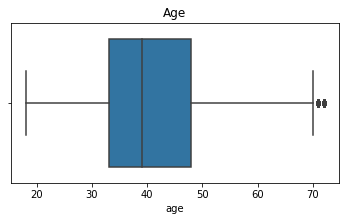

In [31]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Choosing the technique called z score in order to deal with outliers and scaled down the data.

### 3. Categorical Encoding

In [32]:
# Encode your categorical columns
# list of categorical variables
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

# visualise the numerical variables
df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

####  Feature Manipulation

In [33]:
# Lable encoding for each of the categorical columns.
df[['default','housing','loan']]=df[['default','housing','loan']].replace(["yes","no"],["1","0"])
df['month']=df['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df['job']=df['job'].replace(['unknown'],['other'])

In [34]:
# Lable encoding for each of the categorical columns.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['contact']=le.fit_transform(df['contact'])
df['poutcome']=le.fit_transform(df['poutcome'])

####  Feature Selection

In [35]:
# Select your features wisely to avoid overfitting.
# categorical feature selection.

df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

In [36]:
df.shape

(40209, 17)

In [37]:
# Taking a look at the encoded data set.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,10,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,5,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0


For the feature selection we are using the technique called Extra tree clssifier. In order to performe that we have to assign data as X and Y 

####  Assigning X for the independent columns and y for the dependent column.

In [38]:
# X Contains all  independent column.
X = df.drop(['y'],axis=1)

# y cointains Dependent column.
y = df['y']   
df['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

In [39]:
y.shape

(40209,)

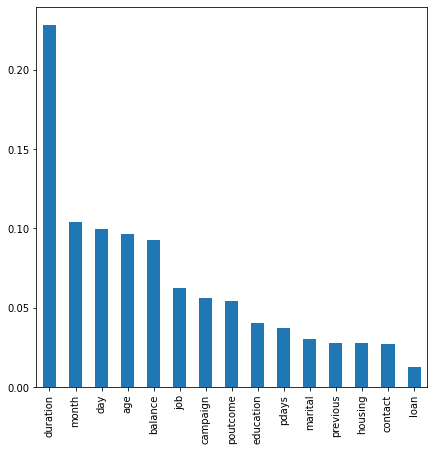

In [40]:
# Visualising the feature importance in dissending format. 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='bar')
plt.show()

##### What all feature selection methods have you used  and why?


Extra Trees Classifier is a useful algorithm for feature selection because it can efficiently handle high-dimensional data, select relevant features, and avoid overfitting.

##### Which all features you found important and why?

Based on above visualisation important features we are going to consider for machine learning models are:

* duration
* contact
* poutcome
* month
* housing
* pdays
* age
* balance.

###  Handling Imbalanced Dataset

<AxesSubplot:xlabel='y', ylabel='count'>

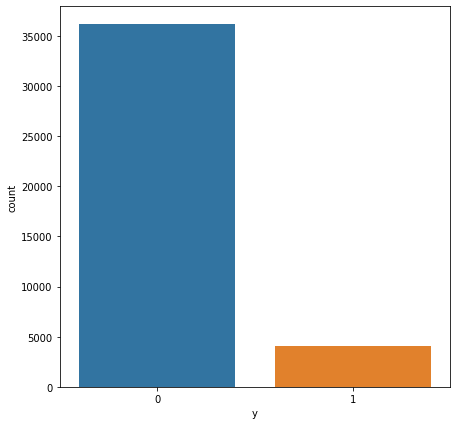

In [41]:
# Visualising imbalance present in the dependent variable.
sns.countplot(x='y',data=df)

##### Do you think the dataset is imbalanced? Explain Why.

The dependent column is highly imbalanced, in the ratio of 90% of 'No' counts and the remaining 10% are 'yes' counts. Hence in order to get the optimal bias of the machince learning model the dependent data has to be balanced.

In [42]:
# Handling Imbalanced Dataset.
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_new,y_new=os.fit_resample(X,y)

Original dataset shape Counter({0: 36155, 1: 4054})
Resampled dataset shape Counter({0: 36155, 1: 36155})


<AxesSubplot:xlabel='y', ylabel='count'>

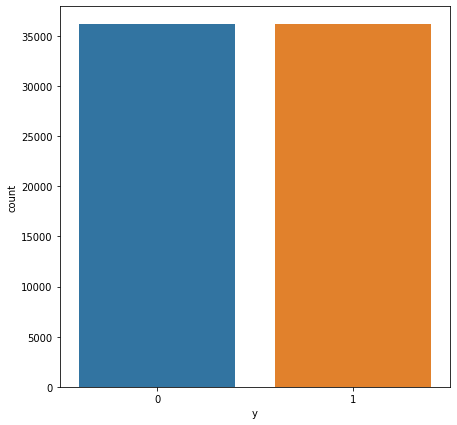

In [43]:
# Visualising dependent variable after deal with imbalance.
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)

##### What technique did you use to handle the imbalance dataset and why? 

Choosing the technique called Random over sampling.
Since the data is imbalanced of 90% to 10% undersampling looses lots of information as the loos of data. Hence in order to overcome that situation the data has to be oversampled.


###  Data Splitting

In [44]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size = 0.2, random_state = 0) 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(57848, 16) (14462, 16) (57848,) (14462,)


##### What data splitting ratio have you used and why? 

Data is divided into 80% for training data and 20 % for testing data. Since data contains 45211 rows, so the model can evaluate 20% of the count.
Hence the 80-20 ratio works good.

In [45]:
# y train value counts.
y_train.value_counts()

0    29008
1    28840
Name: y, dtype: int64

In [46]:
# y test value counts.
y_test.value_counts()

1    7315
0    7147
Name: y, dtype: int64

###  Data Scaling

In [47]:
# Data Scaling.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### Which method have you used to scale you data and why?
Standard scaler is the method used to scale the data. Inthis method the data is tranceformed such a way that

 their μ = 0 and standard deviation = 1.

##Creating some functions for evaluation of model 

In [48]:
# Creating a function for Evaluating model and giving required arrguments for that.

def evaluate_model_s(train_class_preds, test_class_preds, y_train, y_test, X_train, X_test, classification):
    
        # Calculate train accuracy score
    train_accuracy = accuracy_score(train_class_preds, y_train)
    test_accuracy = accuracy_score(test_class_preds, y_test)
    
    print("The accuracy on train data is :", train_accuracy)
    print("The accuracy on test data is :", test_accuracy)
    print('')
    print('')

        # Calculate test accuracy score
    cm_train = confusion_matrix(train_class_preds, y_train)
    cm_test = confusion_matrix(test_class_preds, y_test)
    
    print("The confusion matrix on the train data is :")
    print('')
    print(cm_train)
    print('')
    print("The confusion matrix on the test data is :")
    print('')
    print(cm_test)
    print('')
    print('')
    
        # Calculate accuracy, precision, recall, f1-score
    train_report = classification_report(train_class_preds, y_train)
    test_report = classification_report(test_class_preds, y_test)
    
    print("The classification report on the train data is :")
    print('')
    print(train_report)
    print('')
    print("The classification report on the test data is :")
    print('')
    print(test_report)
    print('')
    print('')
    
    print("The Confusion matrix for over all Train and Test ")
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, test_class_preds)

   

In [49]:
# function to evaluate and calculate accuracy, precision, recall, F1-score for overall accuracy. 

def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    print("The Confusion matrix visualization for over all Train and Test ")

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'auc': auc}

In [50]:
# Calculate area under curve (AUC) and visualise it on chart.

# Creating a function for Auc Roc Curve.
def auc_roc(model):
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  print(auc)

  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')


## ***6. ML Model Implementation***

### ML Model - 1
### Logistic Regression

In [51]:
# Veriable for model call. 
classification= LogisticRegression()
# Fit the Algorithm.
classification.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Get the predicted classes.

train_class_preds_lr = classification.predict(X_train)
test_class_preds_lr = classification.predict(X_test)

In [53]:
# Confusion matrix For train and test.

cm_train_classification = confusion_matrix(train_class_preds_lr, y_train)
cm_test_classification = confusion_matrix(test_class_preds_lr, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
# Analysing logistic model with evaluatig it.

evaluate_model_s(train_class_preds_lr, test_class_preds_lr, y_train, y_test, X_train, X_test,classification)

The accuracy on train data is : 0.7994571981745263
The accuracy on test data is : 0.800235098879823


The confusion matrix on the train data is :

[[23262  5855]
 [ 5746 22985]]

The confusion matrix on the test data is :

[[5797 1539]
 [1350 5776]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     29117
           1       0.80      0.80      0.80     28731

    accuracy                           0.80     57848
   macro avg       0.80      0.80      0.80     57848
weighted avg       0.80      0.80      0.80     57848


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      7336
           1       0.79      0.81      0.80      7126

    accuracy                           0.80     14462
   macro avg       0.80      0.80      0.80     14462
weighted avg       0.80      0.80      0.80     1

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.800235098879823,
 'prec': 0.8105529048554588,
 'rec': 0.7896103896103897,
 'f1': 0.7999446021743647,
 'auc': 0.8743794436547376}

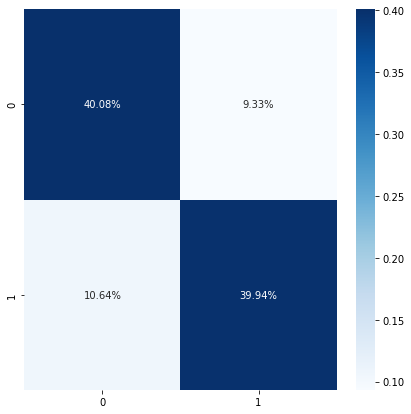

In [55]:
# Overall evalevation summery.

EV1 = evaluate_model(classification, X_test, y_test)
EV1

0.8743794436547376


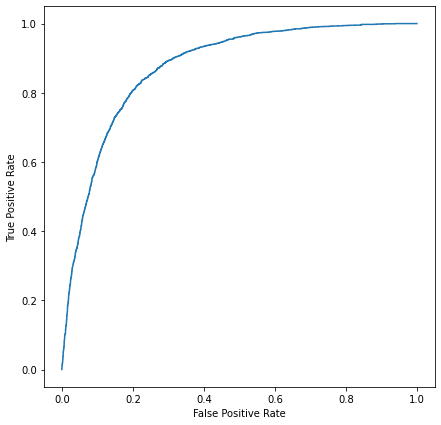

In [56]:
# Visualizing evaluation Metric Score chart

auc_roc(classification)

### ML Model - 2
## Decision Tree

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
from sklearn import tree
# Building Decision Tree model 
dtc = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
# Fit the Algorithm
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [58]:
# Get the predicted classes.
train_class_preds_dtc = dtc.predict(X_train)
test_class_preds_dtc = dtc.predict(X_test)

In [59]:
# Confusion matrix For train and test.
cm_train_dtc = confusion_matrix(train_class_preds_dtc, y_train)
cm_test_dtc = confusion_matrix(test_class_preds_dtc, y_test)

In [60]:
# Analysing Decission tree model with evaluatig it.
evaluate_model_s(train_class_preds_dtc, test_class_preds_dtc, y_train, y_test, X_train, X_test,dtc)

The accuracy on train data is : 0.7819976490112017
The accuracy on test data is : 0.784262204397732


The confusion matrix on the train data is :

[[23304  6907]
 [ 5704 21933]]

The confusion matrix on the test data is :

[[5804 1777]
 [1343 5538]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     30211
           1       0.76      0.79      0.78     27637

    accuracy                           0.78     57848
   macro avg       0.78      0.78      0.78     57848
weighted avg       0.78      0.78      0.78     57848


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7581
           1       0.76      0.80      0.78      6881

    accuracy                           0.78     14462
   macro avg       0.78      0.79      0.78     14462
weighted avg       0.79      0.78      0.78     1

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.784262204397732,
 'prec': 0.8048248801046359,
 'rec': 0.7570745044429255,
 'f1': 0.7802197802197802,
 'auc': 0.8531177371669887}

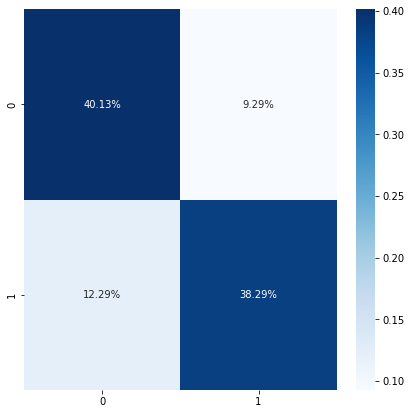

In [61]:
# Overall evalevation summery.
EV2 = evaluate_model(dtc, X_test, y_test)
EV2

0.8531177371669887


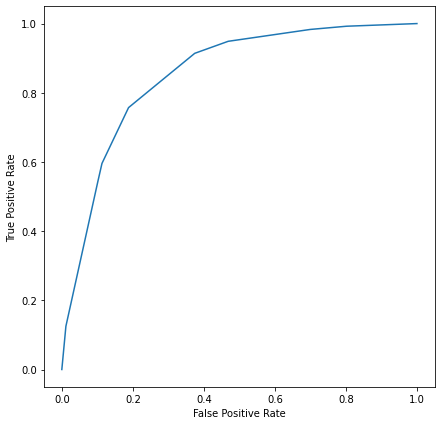

In [62]:
# Visualizing evaluation Metric Score chart
auc_roc(dtc)

### ML Model - 3
# Random Forest

In [63]:
from sklearn.model_selection import cross_val_score
# ML Model -  Implementation Random Forest (Bagging)
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
# Get the predicted classes.
train_class_preds_rf = rf_model.predict(X_train)
test_class_preds_rf = rf_model.predict(X_test)

In [65]:
# Confusion matrix For train and test.
cm_train_rf = confusion_matrix(train_class_preds_rf, y_train)
cm_test_rf = confusion_matrix(test_class_preds_rf, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Analysing Random forest (bagging) model with evaluatig it.
evaluate_model_s(train_class_preds_rf, test_class_preds_rf, y_train, y_test, X_train, X_test,rf_model)

The accuracy on train data is : 1.0
The accuracy on test data is : 0.9751071774305076


The confusion matrix on the train data is :

[[29008     0]
 [    0 28840]]

The confusion matrix on the test data is :

[[6787    0]
 [ 360 7315]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29008
           1       1.00      1.00      1.00     28840

    accuracy                           1.00     57848
   macro avg       1.00      1.00      1.00     57848
weighted avg       1.00      1.00      1.00     57848


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6787
           1       1.00      0.95      0.98      7675

    accuracy                           0.98     14462
   macro avg       0.97      0.98      0.98     14462
weighted avg       0.98      0.98      0.98     14462



The Co

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.9751071774305076,
 'prec': 0.9530944625407166,
 'rec': 1.0,
 'f1': 0.9759839893262175,
 'auc': 0.9999620889740409}

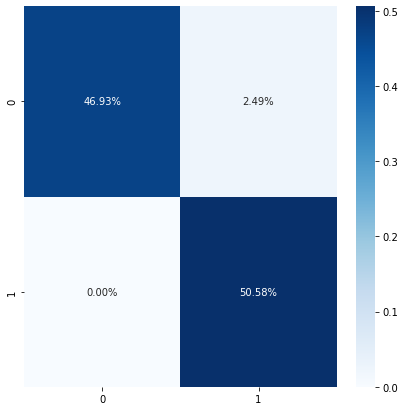

In [67]:
# Overall evalevation summery.
EV3 = evaluate_model(rf_model, X_test, y_test)
EV3

0.9999620889740409


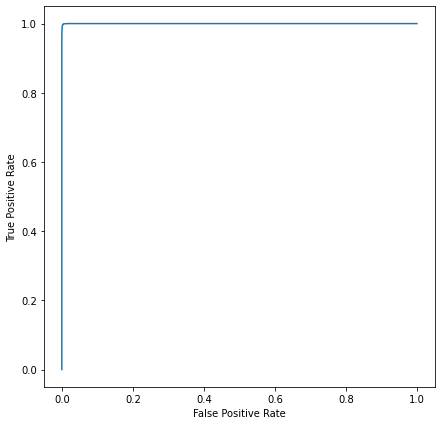

In [68]:
# Visualizing evaluation Metric Score chart
auc_roc(rf_model)

### ML Model - 4
## XgBoost Classifier

In [69]:
#Create an XGB classifier and train it on 70% of the data set.
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [70]:
# Fit the Algorithm.

clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [71]:
# Get the predicted classes.
train_class_preds_clf = clf.predict(X_train)
test_class_preds_clf = clf.predict(X_test)

In [72]:
# Confusion matrix For train and test.
cm_train_clf = confusion_matrix(train_class_preds_clf, y_train)
cm_test_clf = confusion_matrix(test_class_preds_clf, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Analysing Xg boost classifier (BOOSING) model with evaluatig it.
evaluate_model_s(train_class_preds_clf, test_class_preds_clf, y_train, y_test, X_train, X_test,clf)

The accuracy on train data is : 0.9451666436177569
The accuracy on test data is : 0.9291246024063062


The confusion matrix on the train data is :

[[26565   729]
 [ 2443 28111]]

The confusion matrix on the test data is :

[[6382  260]
 [ 765 7055]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     27294
           1       0.97      0.92      0.95     30554

    accuracy                           0.95     57848
   macro avg       0.95      0.95      0.95     57848
weighted avg       0.95      0.95      0.95     57848


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      6642
           1       0.96      0.90      0.93      7820

    accuracy                           0.93     14462
   macro avg       0.93      0.93      0.93     14462
weighted avg       0.93      0.93      0.93     

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.9751071774305076,
 'prec': 0.9530944625407166,
 'rec': 1.0,
 'f1': 0.9759839893262175,
 'auc': 0.9999620889740409}

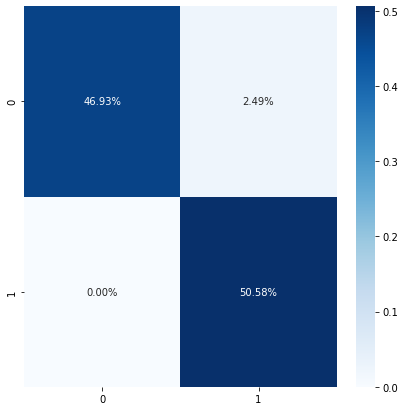

In [74]:
# Overall evalevation summery.
EV4 = evaluate_model(rf_model, X_test, y_test)
EV4

0.971925508085693


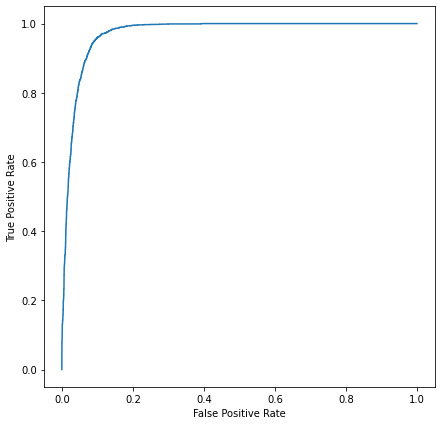

In [75]:
# Visualizing evaluation Metric Score chart
auc_roc(clf)

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create an instance of the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')


##### Which hyperparameter optimization technique have you used and why?



GridSearchCV is a powerful technique that can help improve the performance of machine learning models by finding the best set of hyperparameters.

In [77]:
# Create an instance of the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
# Fit the Algorithm
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc')

In [78]:
# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'subsample': 0.8}
Best score: 0.974815867650603


In [79]:
# Retrain the model on the full training data using the best hyperparameters
xgb_model = xgb.XGBClassifier(**grid_search.best_params_, objective='binary:logistic', eval_metric='logloss')
# Fit the Algorithm
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [80]:
#Fitting the data with best parameters.
xgb_optimal=XGBClassifier(colsample_bytree= 1.0, learning_rate=0.2, max_depth = 7, subsample = 0.6)
# Fit the Algorithm
xgb_optimal.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [81]:
# Training the model usig optimal parmeter.
train_class_preds_xgb_optimal = xgb_optimal.predict(X_train)
test_class_preds_xgb_optimal = xgb_optimal.predict(X_test)

In [82]:
# Confusion matrix For train and test.
cm_train_xgb_optimal = confusion_matrix(train_class_preds_xgb_optimal, y_train)
cm_test_xgb_optimal = confusion_matrix(test_class_preds_xgb_optimal, y_test)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



In [83]:
# Analysing XG boost after tuning the hyper parameter with evaluatig it.
evaluate_model_s(train_class_preds_xgb_optimal, test_class_preds_xgb_optimal, y_train, y_test, X_train, X_test,xgb_optimal)

The accuracy on train data is : 0.9557115198451114
The accuracy on test data is : 0.9383902641405062


The confusion matrix on the train data is :

[[26901   455]
 [ 2107 28385]]

The confusion matrix on the test data is :

[[6431  175]
 [ 716 7140]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     27356
           1       0.98      0.93      0.96     30492

    accuracy                           0.96     57848
   macro avg       0.96      0.96      0.96     57848
weighted avg       0.96      0.96      0.96     57848


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6606
           1       0.98      0.91      0.94      7856

    accuracy                           0.94     14462
   macro avg       0.94      0.94      0.94     14462
weighted avg       0.94      0.94      0.94     

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.9383902641405062,
 'prec': 0.9088594704684317,
 'rec': 0.9760765550239234,
 'f1': 0.9412695273877794,
 'auc': 0.9741547223184716}

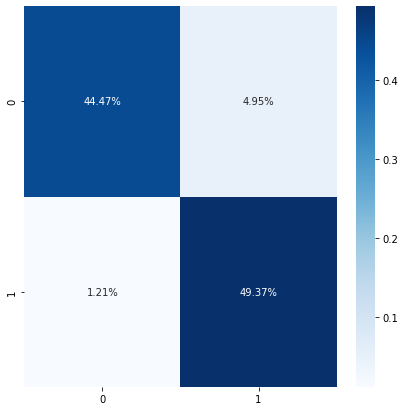

In [84]:
# Overall evalevation summery.
EV5 = evaluate_model(xgb_optimal, X_test, y_test)
EV5

0.9741547223184716


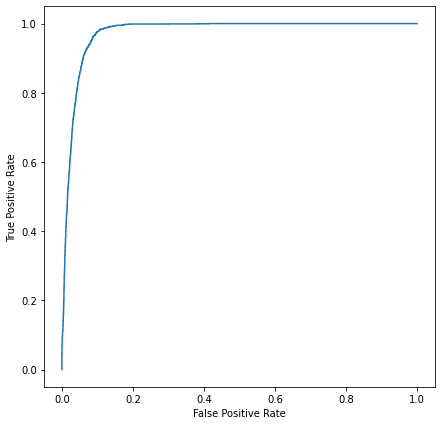

In [85]:
auc_roc(xgb_optimal)

### ML Model - 5
## K Nearest Neighbour

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the Algorithm
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
# Get the predicted classes.
train_class_preds_knn = knn.predict(X_train)
test_class_preds_knn = knn.predict(X_test)

In [88]:
# Confusion matrix For train and test.
cm_train_knn = confusion_matrix(train_class_preds_knn, y_train)
cm_test_knn = confusion_matrix(test_class_preds_knn, y_test)

In [89]:
# Analysing KNN model with evaluatig it.
evaluate_model_s(train_class_preds_knn, test_class_preds_knn, y_train, y_test, X_train, X_test,knn)

The accuracy on train data is : 0.9450974968883972
The accuracy on test data is : 0.9279491080071912


The confusion matrix on the train data is :

[[25875    43]
 [ 3133 28797]]

The confusion matrix on the test data is :

[[6151   46]
 [ 996 7269]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25918
           1       1.00      0.90      0.95     31930

    accuracy                           0.95     57848
   macro avg       0.95      0.95      0.94     57848
weighted avg       0.95      0.95      0.95     57848


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6197
           1       0.99      0.88      0.93      8265

    accuracy                           0.93     14462
   macro avg       0.93      0.94      0.93     14462
weighted avg       0.94      0.93      0.93     

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.9279491080071912,
 'prec': 0.879491833030853,
 'rec': 0.9937115516062884,
 'f1': 0.9331193838254173,
 'auc': 0.9661824849721132}

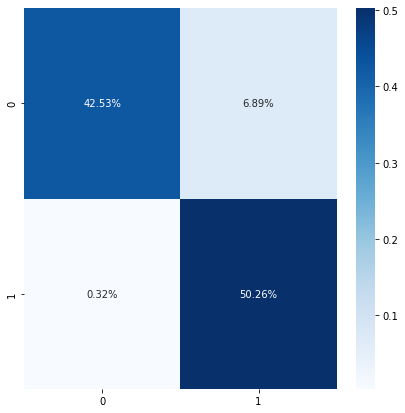

In [90]:
# Overall evalevation summery.
EV6 = evaluate_model(knn, X_test, y_test)
EV6

0.9661824849721132


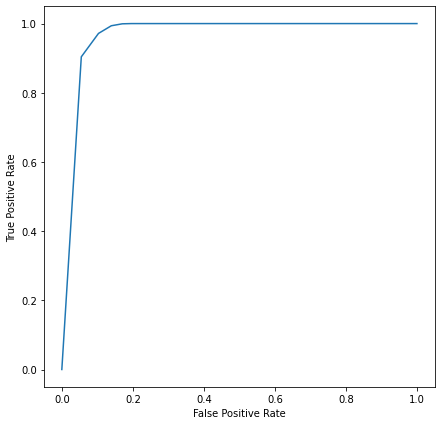

In [91]:
# Visualizing evaluation Metric Score chart

auc_roc(knn)

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# Creating an object of classifier.
knn=KNeighborsClassifier()

In [93]:
# Parameter grid values.
grid_values = {'n_neighbors':list(range(1,20))}

In [94]:
# Applying GridSearchCv with above grid values and cv=7
knn_tune=GridSearchCV(knn,cv=7,scoring='accuracy',verbose=3,param_grid=grid_values)
# Fit the Algorithm
knn_tune.fit(X_train,y_train)

Fitting 7 folds for each of 19 candidates, totalling 133 fits
[CV 1/7] END .....................n_neighbors=1;, score=0.966 total time=   3.1s
[CV 2/7] END .....................n_neighbors=1;, score=0.961 total time=   2.2s
[CV 3/7] END .....................n_neighbors=1;, score=0.964 total time=   2.2s
[CV 4/7] END .....................n_neighbors=1;, score=0.961 total time=   2.3s
[CV 5/7] END .....................n_neighbors=1;, score=0.964 total time=   2.2s
[CV 6/7] END .....................n_neighbors=1;, score=0.962 total time=   3.9s
[CV 7/7] END .....................n_neighbors=1;, score=0.968 total time=   2.9s
[CV 1/7] END .....................n_neighbors=2;, score=0.962 total time=   2.2s
[CV 2/7] END .....................n_neighbors=2;, score=0.958 total time=   2.2s
[CV 3/7] END .....................n_neighbors=2;, score=0.962 total time=   2.1s
[CV 4/7] END .....................n_neighbors=2;, score=0.956 total time=   2.2s
[CV 5/7] END .....................n_neighbors=2

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=3)

In [95]:
# Getting thge best parameters.
knn_tune.best_params_ 

{'n_neighbors': 1}

In [96]:
# Fitting the data with best parameters.
knn_optimal=KNeighborsClassifier(n_neighbors=1)
# Fit the Algorithm
knn_optimal.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [97]:
# Get the predicted classes.
train_class_preds_knn_optimal= knn_optimal.predict(X_train)
test_class_preds_knn_optimal = knn_optimal.predict(X_test)

In [98]:
# Confusion matrix For train and test.
cm_train_knn_optimal = confusion_matrix(train_class_preds_knn_optimal, y_train)
cm_test_knn_optimal = confusion_matrix(test_class_preds_knn_optimal, y_test)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [99]:
# Analysing KNN modelafter tuning the hyperparameter by evaluatig it.
evaluate_model_s(train_class_preds_knn_optimal, test_class_preds_knn_optimal, y_train, y_test, X_train, X_test,knn_optimal)

The accuracy on train data is : 1.0
The accuracy on test data is : 0.9696445858110911


The confusion matrix on the train data is :

[[29008     0]
 [    0 28840]]

The confusion matrix on the test data is :

[[6708    0]
 [ 439 7315]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29008
           1       1.00      1.00      1.00     28840

    accuracy                           1.00     57848
   macro avg       1.00      1.00      1.00     57848
weighted avg       1.00      1.00      1.00     57848


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6708
           1       1.00      0.94      0.97      7754

    accuracy                           0.97     14462
   macro avg       0.97      0.97      0.97     14462
weighted avg       0.97      0.97      0.97     14462



The Co

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.9696445858110911,
 'prec': 0.9433840598400826,
 'rec': 1.0,
 'f1': 0.9708673435529895,
 'auc': 0.9692878130684204}

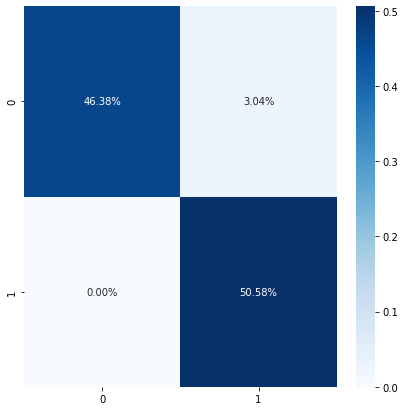

In [100]:
# Overall evalevation summery.
EV7 = evaluate_model(knn_optimal, X_test, y_test)
EV7

0.9692878130684204


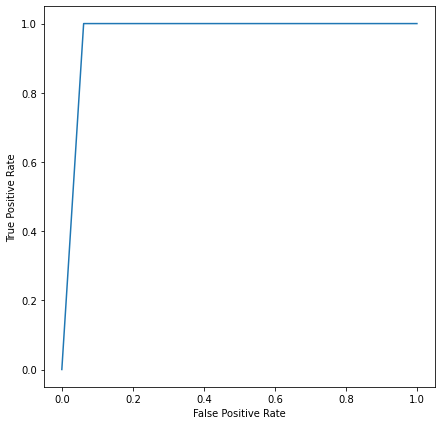

In [101]:
# Visualizing evaluation Metric Score chart
auc_roc(knn_optimal)

### ML Model - 6
## Support Vector Classifier

In [102]:
from sklearn import svm
svc_clf = svm.SVC(probability=True)
# Fit the Algorithm.
svc_clf.fit(X_train,y_train)

SVC(probability=True)

In [103]:
# Get the predicted classes.
train_class_preds_svc_clf = svc_clf.predict(X_train)
test_class_preds_svc_clf= svc_clf.predict(X_test)

In [104]:
# Confusion matrix For train and test.
cm_train_svc_clf = confusion_matrix(train_class_preds_svc_clf, y_train)
cm_test_svc_clf = confusion_matrix(test_class_preds_svc_clf, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [105]:
# Analysing Support Vector Classifier model with evaluatig it.
evaluate_model_s(train_class_preds_svc_clf, test_class_preds_svc_clf, y_train, y_test, X_train, X_test,svc_clf)

The accuracy on train data is : 0.8743949661181026
The accuracy on test data is : 0.8632277693265109


The confusion matrix on the train data is :

[[24208  2466]
 [ 4800 26374]]

The confusion matrix on the test data is :

[[5907  738]
 [1240 6577]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     26674
           1       0.91      0.85      0.88     31174

    accuracy                           0.87     57848
   macro avg       0.87      0.88      0.87     57848
weighted avg       0.88      0.87      0.87     57848


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6645
           1       0.90      0.84      0.87      7817

    accuracy                           0.86     14462
   macro avg       0.86      0.87      0.86     14462
weighted avg       0.87      0.86      0.86     

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.8632277693265109,
 'prec': 0.8413713700908276,
 'rec': 0.8991114149008886,
 'f1': 0.8692836373248745,
 'auc': 0.9275334181772656}

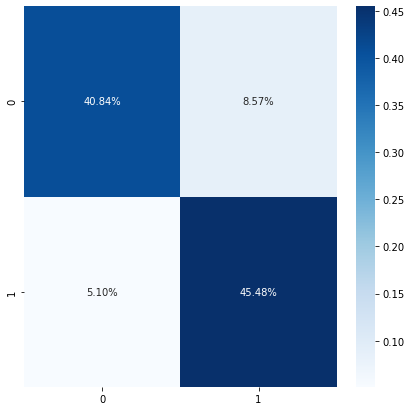

In [106]:
# Overall evalevation summery.
EV8 = evaluate_model(svc_clf, X_test, y_test)
EV8

0.9275334181772656


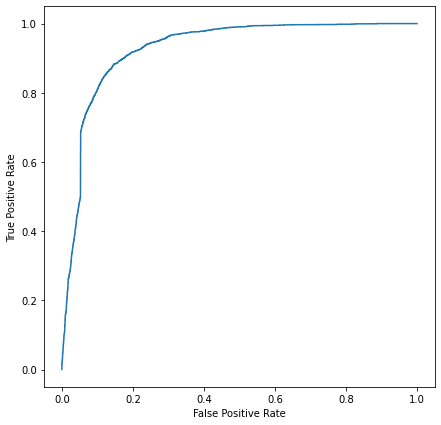

In [107]:
# Visualizing evaluation Metric Score chart
auc_roc(svc_clf)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Recall measures the model's ability to correctly identify all positive instances, without falsely classifying them as negative. A high recall score indicates that the model is effective at identifying positive instances, while a low recall score indicates that the model is missing some positive instances.

In the metric used the type 2 error resulted in low values for the false positives and false negative which makes the recall score as a good value for the business.

## Model comparison

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [108]:
# Creating a veriable for All evaluation matrix.
Eval_overall = [EV1,EV2,EV3,EV4,EV5,EV6,EV7,EV8]

In [109]:
# Creating a dataframe from the All Evaluation matrix.

df_O = pd.DataFrame(Eval_overall, index=['Logistic', 'Decision_tree', 'random_forest', 'XG_boost', 'Tuned_XGB', 'KNN', 'Tuned_KNN', 'SVC'])
df_O

,acc,prec,rec,f1,auc
Logistic,0.800235,0.810553,0.789610,0.799945,0.874379
Decision_tree,0.784262,0.804825,0.757075,0.780220,0.853118
random_forest,0.975107,0.953094,1.000000,0.975984,0.999962
XG_boost,0.975107,0.953094,1.000000,0.975984,0.999962
Tuned_XGB,0.938390,0.908859,0.976077,0.941270,0.974155
KNN,0.927949,0.879492,0.993712,0.933119,0.966182
Tuned_KNN,0.969645,0.943384,1.000000,0.970867,0.969288
SVC,0.863228,0.841371,0.899111,0.869284,0.927533


Text(0.5, 1.0, 'Comparison of Metrics for Different Models')

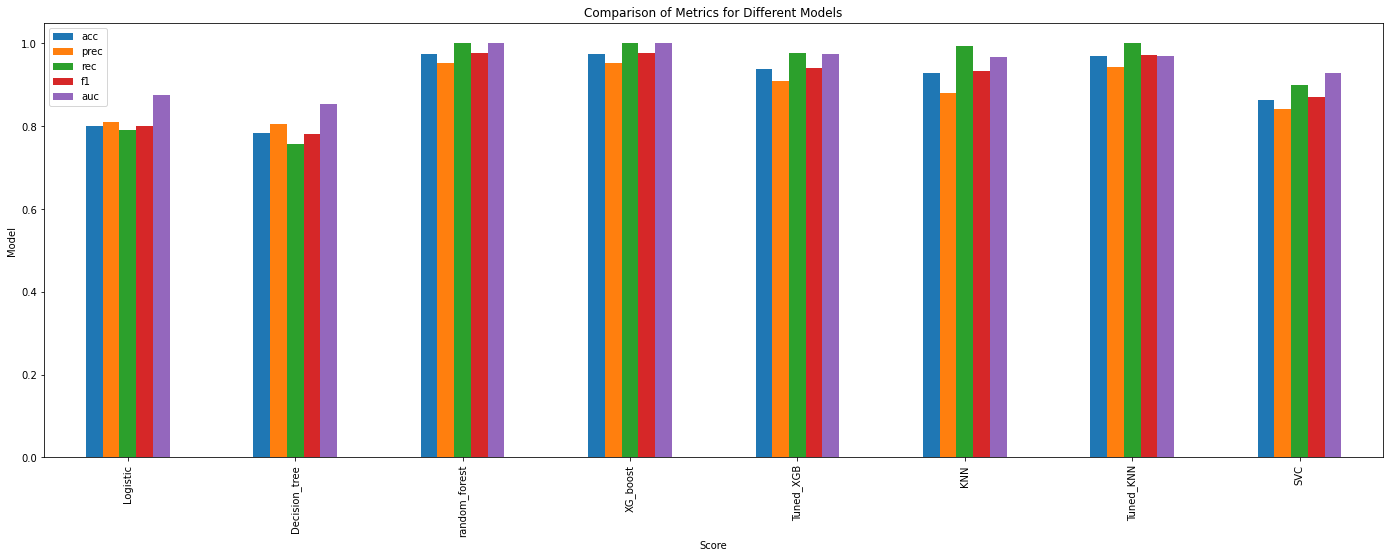

In [110]:
# Create a horizontal bar plot

ax = df_O.plot(kind='bar', figsize=(24, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax.set_xlabel('Score')
ax.set_ylabel('Model')
ax.set_title('Comparison of Metrics for Different Models')

The top-performing models in terms of accuracy, precision, recall, and F1-score are the random forest and XGBoost models, with identical scores for all metrics. This suggests that these models are equally good at predicting the target variable.

# **Conclusion**

 -It was a great learning experience working on a financial dataset.
Our dataset consist of categorical and numerical features.
We have 16 independent features, out of these only half of them are important.
'duration' is the most important feature while 'education' is the least important feature.
Month of May have seen the highest number of clients contacted but have the least success rate. Highest success rate is observed for end month of the financial year as well as the calendar year. So one can say that our dataset have some kind of seasonality.
When visualized age in groups, it is found that clients with age less than 30 and greater than 60 are less contacted through the campaign but have a higher success rate.
Different machine learning models are trained and tested on the dataset. Out of those Voting Classifier performs best. Logistic Regression is also an important model as it results in high AUC score.
Different models are summarized in table below.

* The top-performing models in terms of accuracy, precision, recall, and F1-score are the random forest and XGBoost models, with identical scores for all metrics. This suggests that these models are equally good at predicting the target variable.
* The tuned KNN model also performed well, with high scores for all metrics, indicating that the model is effective at making predictions.
* The logistic regression and decision tree models both had lower scores than the other models for all metrics, suggesting that they may not be as effective at predicting the target variable.
* The support vector machine (SVM) model had a lower score than the other models for all metrics except AUC. This suggests that while the SVM model may be less accurate than the other models, it may be better at distinguishing between positive and negative cases.
* Overall, the random forest, XGBoost, and tuned KNN models are the most effective models for predicting the target variable based on the evaluation metrics provided. However, it's important to note that other factors, such as model interpretability and computational complexity, may also be important considerations in choosing the best model for a specific task.